In [1]:
import pandas as pd
import numpy as np
import os
from scipy.signal import firwin, lfilter
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Data Explanation

- Collected wireless data using Sense2GoL radar
- Concatenated 10 recordings for each person's breathing type (normal, deep, fast)
- Applied Random Forest Model to predict Blood Pressure (BP) values from the recordings
- Goal of this project was to caclulate & examine accuracy of wireless BP recordings using a radar

# Function to Load Binary Data
- Load in data collected in binary form
- Data for 3 people, 3 breathing types (normal, fast, deep)
- 10 concatenated recordings for each breathing type

In [2]:
def load_binary_file(file_path):
    return np.fromfile(file_path, dtype=np.float32)

def load_person1_normal_recordings(person, speed):
    recordings = []
    directory = os.path.join("Data2", person, speed, 'BIN')
    
    file_list = sorted(os.listdir(directory))
    
    for file_name in file_list:
        if file_name.endswith('.bin'):
            file_path = os.path.join(directory, file_name)
            data = load_binary_file(file_path)
            recordings.append(data)
    
    concatenated_data = np.concatenate(recordings)
    return concatenated_data

## Why Use 10 Concatenated Values
- Aggregates data to reduce it's variability
- Better representation of each person's breathing: individal recordings may be inaccurate
- Enhances frequency-based feature extraction: Integrated PSD

In [3]:
p1_normal_data = load_person1_normal_recordings("Humayun", "Normal")
p1_fast_data = load_person1_normal_recordings("Humayun", "Fast")
p1_deep_data = load_person1_normal_recordings("Humayun", "Deep")

p2_normal_data = load_person1_normal_recordings("Yaheya", "Normal")
p2_fast_data = load_person1_normal_recordings("Yaheya", "Fast")
p2_deep_data = load_person1_normal_recordings("Yaheya", "Deep")

p3_normal_data = load_person1_normal_recordings("X", "Normal")
p3_fast_data = load_person1_normal_recordings("X", "Fast")
p3_deep_data = load_person1_normal_recordings("X", "Deep")

print(p1_normal_data)

[ 5.2568638e+01  4.6006030e-41  3.3554432e+07 ... -5.5438969e+31
 -5.5438969e+31 -1.0492828e+33]


# Bandpass Filter
- Raw binary data is messy and full of noise
- Bandpass filter isolates important frequencies related to breathing
- Filtered data is ready for feature analysis, extraction and machine learning predictions

## FIR filter
- Finite Impulse Response (FIR) filter, used in signal processing
- Removes unwanted noise, providing cleaner data

In [4]:
# Sample rate (in Hz)
sample_rate = 2000

nyquist_rate = sample_rate / 2

# No. coef in FIR filter
order = 100

# Pass freq. between 5 Hz and 30 Hz
cutoff_freqs = [5, 30]

# Generates coef. for FIR filter
coefficients = firwin(order, [f / nyquist_rate for f in cutoff_freqs], pass_zero=False)

# Applies FIR filter to Input Data
def bandpass_filter(data):
    return lfilter(coefficients, 1.0, data)
    
p1_normal_data_bpf = bandpass_filter(p1_normal_data)
p1_fast_data_bpf = bandpass_filter(p1_fast_data)
p1_deep_data_bpf = bandpass_filter(p1_deep_data)

p2_normal_data_bpf = bandpass_filter(p2_normal_data)
p2_fast_data_bpf = bandpass_filter(p2_fast_data)
p2_deep_data_bpf = bandpass_filter(p2_deep_data)

p3_normal_data_bpf = bandpass_filter(p3_normal_data)
p3_fast_data_bpf = bandpass_filter(p3_fast_data)
p3_deep_data_bpf = bandpass_filter(p3_deep_data)

# Ignore warning: non-critical, caused by null values

C:\Users\humay\anaconda3\Lib\site-packages\scipy\signal\_signaltools.py:2135: RuntimeWarning: invalid value encountered in cast
  x = np.array(x, dtype=dtype, copy=False)


# Spectogram
- Created to visualise the breathing signal & extract meaningful features: f, ps
- Uses Short-Time & Fast Fourier Transform
- f: Frequency bins according to PSD values (required for spectrum integration)
- ps: Power Spectral Density is the power of a signal across frequencies (required for spectrum integration)

## STFT & FFT
- STFT: Used to analyse signals with changing frequencies over time. Applies FFT
- FFT: Provides view of frequency content of entire signal, does not show how frequencies change over time

In [5]:
# No. data points in each window segment used in STFT
window_length = 256

# Sample overlap between adjacent segments
overlap_length = 50

# No. points used in FFT
nfft = 1024

# Return freq. from the spectogram of input data (through bandpass filter)
def freq(data_bpf):
    f, t, ps = spectrogram(data_bpf, fs=sample_rate, window='hann', nperseg=window_length, noverlap=overlap_length, nfft=nfft)
    return f

# Return PSD (Power Spectral Density) from the spectogram of input data (through bandpass filter)
def ps(data_bpf):
    f, t, ps = spectrogram(data_bpf, fs=sample_rate, window='hann', nperseg=window_length, noverlap=overlap_length, nfft=nfft)
    return ps

p1_normal_f = freq(p1_normal_data_bpf)
p1_fast_f = freq(p1_fast_data_bpf)
p1_deep_f = freq(p1_deep_data_bpf)
p1_normal_ps = ps(p1_normal_data_bpf)
p1_fast_ps = ps(p1_fast_data_bpf)
p1_deep_ps = ps(p1_deep_data_bpf)

p2_normal_f = freq(p2_normal_data_bpf)
p2_fast_f = freq(p2_fast_data_bpf)
p2_deep_f = freq(p2_deep_data_bpf)
p2_normal_ps = ps(p2_normal_data_bpf)
p2_fast_ps = ps(p2_fast_data_bpf)
p2_deep_ps = ps(p2_deep_data_bpf)

p3_normal_f = freq(p3_normal_data_bpf)
p3_fast_f = freq(p3_fast_data_bpf)
p3_deep_f = freq(p3_deep_data_bpf)
p3_normal_ps = ps(p3_normal_data_bpf)
p3_fast_ps = ps(p3_fast_data_bpf)
p3_deep_ps = ps(p3_deep_data_bpf)

## Generate & Plot a Spectogram

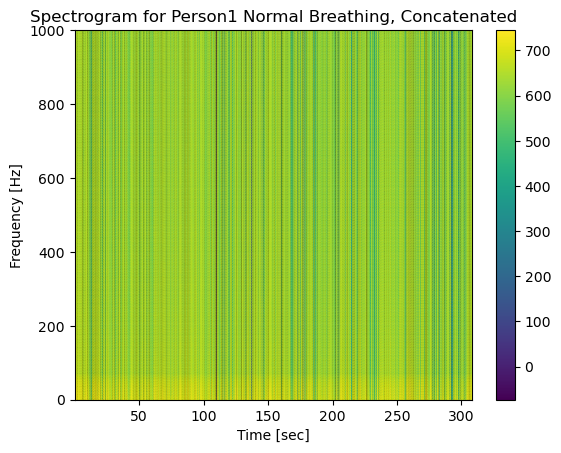

In [6]:
# t = time points corresponding to each segment of data
f, t, ps = spectrogram(p1_normal_data_bpf, fs=sample_rate, window='hann', nperseg=window_length, noverlap=overlap_length, nfft=nfft)

# Convert PSD from linear to decibel scale (for better visualisation)
ps_db = 10 * np.log10(ps)

plt.figure()
plt.pcolormesh(t, f, ps_db, shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram for Person1 Normal Breathing, Concatenated')
plt.show()

## Power Spectral Density contains Nulls & Large Values
- I will replace null values with the mean of its row (recording)
- Standardise large values using ps_db (PSD in decibels)

## Which Value to Use
- Use ps (linear)  for calculations: does not standardise large values {ps = 10 ** (ps_db / 10)}
- Use ps_db (decibal) for plots: standardises large values {ps_db = 10 * np.log10(ps)}

In [7]:
# Replace null values in rows of ps with the mean of the row its in
def ps_null(ps):
    ps1 = ps
    ps1_cleaned = [row[~np.isnan(row)] for row in ps1]
    ps1_cleaned = np.array(ps1_cleaned)
    
    means_of_rows = []
    for each in ps1_cleaned:
        means_of_rows.append(each.mean())
        
    for i in range(ps.shape[0]):
        nan_mask = np.isnan(ps[i])
        ps[i, nan_mask] = means_of_rows[i]
    
    # ps_db standardises ps since it has large values
    ps_db = 10 * np.log10(ps)
    return ps_db

p1_normal_ps_db = ps_null(p1_normal_ps)
p1_fast_ps_db = ps_null(p1_fast_ps)
p1_deep_ps_db = ps_null(p1_deep_ps)

p2_normal_ps_db = ps_null(p2_normal_ps)
p2_fast_ps_db = ps_null(p2_fast_ps)
p2_deep_ps_db = ps_null(p2_deep_ps)

p3_normal_ps_db = ps_null(p3_normal_ps)
p3_fast_ps_db = ps_null(p3_fast_ps)
p3_deep_ps_db = ps_null(p3_deep_ps)

## Plot Power Spectral Density

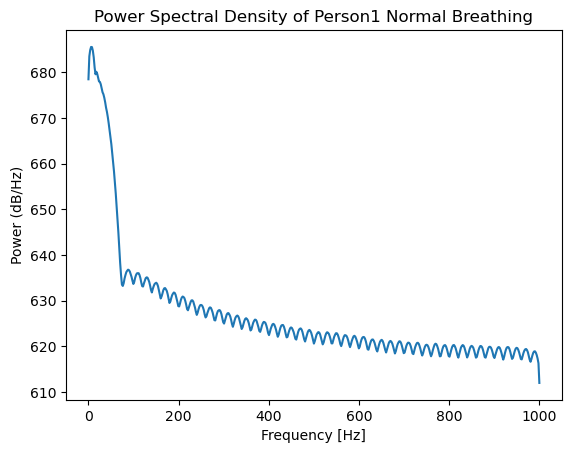

In [23]:
# Plot PSD using: freq. and PSD in decibal scale
plt.figure()
plt.plot(p1_normal_f, p1_normal_ps_db.mean(axis=1))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power (dB/Hz)')
plt.title('Power Spectral Density of Person1 Normal Breathing')
plt.show()

# Spectrum Integration
- Used as a key feature in Random Forest model predictions
- Calculates total power/energy of a signal within a range
- Find the indices corresponding to the frequency range
- Integrate PSD over the specified range using the trapezoidal rule

In [9]:
# Freq. range over whihch PSD will be integrated
# Why 5-10 Hz instead of 5-30 Hz: better captures breathing signal
freq_min = 5
freq_max = 10

from scipy.integrate import simps

def integrate_psd(frequencies, psd, freq_min, freq_max):
    
    # Make linear (back to ps) for calculations
    psd = 10 ** (psd / 10)
    
    # Indices of freq. array which lie in our freq. range
    freq_indices = np.where((frequencies >= freq_min) & (frequencies <= freq_max))[0]
    
    # Numerical integration using trapezoidal rule: PSD values that correspond to freq. range
    integrated_psd = np.trapz(psd[freq_indices], frequencies[freq_indices])
    
    return integrated_psd

p1_normal_integrated = integrate_psd(p1_normal_f, p1_normal_ps_db.mean(axis=1), freq_min, freq_max)
p1_fast_integrated = integrate_psd(p1_fast_f, p1_fast_ps_db.mean(axis=1), freq_min, freq_max)
p1_deep_integrated = integrate_psd(p1_deep_f, p1_deep_ps_db.mean(axis=1), freq_min, freq_max)

p2_normal_integrated = integrate_psd(p2_normal_f, p2_normal_ps_db.mean(axis=1), freq_min, freq_max)
p2_fast_integrated = integrate_psd(p2_fast_f, p2_fast_ps_db.mean(axis=1), freq_min, freq_max)
p2_deep_integrated = integrate_psd(p2_deep_f, p2_deep_ps_db.mean(axis=1), freq_min, freq_max)

p3_normal_integrated = integrate_psd(p3_normal_f, p3_normal_ps_db.mean(axis=1), freq_min, freq_max)
p3_fast_integrated = integrate_psd(p3_fast_f, p3_fast_ps_db.mean(axis=1), freq_min, freq_max)
p3_deep_integrated = integrate_psd(p3_deep_f, p3_deep_ps_db.mean(axis=1), freq_min, freq_max)

# Hidden Semi-Markov Model
- Why: helps determine how long a person stays in each breathing state & when transitions between states
- Used as a feature in Random Forest model predictions
- Approximated using a HMM (Hidden Markov Model)

In [11]:
pip install hmmlearn

Note: you may need to restart the kernel to use updated packages.


## Prepare Dataframe for HSMM

In [12]:
integrated_psd_values = np.array([
    [p1_normal_integrated, p1_fast_integrated, p1_deep_integrated],
    [p2_normal_integrated, p2_fast_integrated, p2_deep_integrated],
    [p3_normal_integrated, p3_fast_integrated, p3_deep_integrated],
])

flattened_psd_values = integrated_psd_values.flatten()

persons = np.repeat(['Person 1', 'Person 2', 'Person 3'], 3)
breathing_types = ['Normal', 'Fast', 'Deep'] * 3

df = pd.DataFrame({
    'Person': persons,
    'Breathing_Type': breathing_types,
    'Integrated_PSD': flattened_psd_values
})

print(df)

     Person Breathing_Type  Integrated_PSD
0  Person 1         Normal    1.327547e+69
1  Person 1           Fast    1.845477e+72
2  Person 1           Deep    8.691478e+69
3  Person 2         Normal    5.659412e+67
4  Person 2           Fast    9.835631e+71
5  Person 2           Deep    8.239859e+70
6  Person 3         Normal    3.095381e+69
7  Person 3           Fast    3.279454e+71
8  Person 3           Deep    6.983103e+70


In [31]:
from hmmlearn.hmm import GaussianHMM

# No. of main states (Normal, Fast, Deep)
n_states = 3

# No. of substates per main state (Person 1,2,3)
n_substates_per_state = 3

# Total no. of states
total_substates = n_states * n_substates_per_state

x = df['Integrated_PSD'].values.reshape(-1, 1)

model = GaussianHMM(n_components=3, covariance_type="diag", n_iter=100, random_state=100)

# Fit the model to your data
model.fit(x)

##### Create HSMM model rather than HMM #####

# Create transition matrix for HSMM-like model
transmat = np.zeros((total_substates, total_substates))

# Fill in the transition matrix: fill in transitions for main states' corresponding substates
for i in range(n_states):
    start = i * n_substates_per_state
    end = start + n_substates_per_state
    
    # Within substate transitions: fills the transition probabilities for each substate within a main state
    for j in range(start, end):
        if j < end - 1:
            transmat[j, j + 1] = 0.7
        transmat[j, j] = 0.3
        if j == end - 1:
            transmat[j, start:start + n_substates_per_state] = 0.1 / n_substates_per_state

# Normalize the transition matrix rows to ensure they sum to 1
transmat /= transmat.sum(axis=1, keepdims=True)

# Assign the transition matrix to the model: Creates HSMM-like model
model.transmat_ = transmat

##########

# Predict states
model.fit(x)
predicted_states = model.predict(x)

print("Predicted States:", predicted_states)

# Can ignore warnings: arise due to small dataset

Fitting a model with 14 free scalar parameters with only 9 data points will result in a degenerate solution.
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Fitting a model with 14 free scalar parameters with only 9 data points will result in a degenerate solution.
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


Predicted States: [1 2 0 1 2 0 1 2 0]


In [14]:
state_mapping = {0: 'Normal', 1: 'Fast', 2: 'Deep'}

# Map predicted states to breathing patterns
predicted_patterns = [state_mapping[state] for state in predicted_states]

print("Predicted Breathing Patterns:", predicted_patterns)

Predicted Breathing Patterns: ['Fast', 'Deep', 'Normal', 'Fast', 'Deep', 'Normal', 'Fast', 'Deep', 'Normal']


# Feature Extraction
- Used to find useful features for predictions
- After feature extraction no feature was selected for predictions
- None provided new useful information, for example:
- STD_PSD = null
- Mean/Min/Max_PSD = same as Integrated PSD
- State Counts = same as predicted states

In [15]:
import numpy as np
import pandas as pd

# Add predicted states to dataframe
df['Predicted_States'] = predicted_states

feature_list = []

# Extract features for each breathing pattern
for person in df['Person'].unique():
    for breathing_type in df['Breathing_Type'].unique():
        filtered_df = df[(df['Person'] == person) & (df['Breathing_Type'] == breathing_type)]
        
        # Extract features
        mean_psd = filtered_df['Integrated_PSD'].mean()
        std_psd = filtered_df['Integrated_PSD'].std()
        max_psd = filtered_df['Integrated_PSD'].max()
        min_psd = filtered_df['Integrated_PSD'].min()

        # Unique states & no. of times they occured
        unique, counts = np.unique(filtered_df['Predicted_States'].values, return_counts=True)
        state_counts = dict(zip(unique, counts))

        # Feature vector
        features = {
            'Person': person,
            'Breathing_Type': breathing_type,
            'Mean_PSD': mean_psd,
            'STD_PSD': std_psd,
            'Max_PSD': max_psd,
            'Min_PSD': min_psd,
            'State_0_Count': state_counts.get(0, 0),
            'State_1_Count': state_counts.get(1, 0),
            'State_2_Count': state_counts.get(2, 0),
        }
        
        # Append features to the list
        feature_list.append(features)

# Convert the list of features to a DataFrame
features_df = pd.DataFrame(feature_list)

# Display the extracted features
features_df

,Person,Breathing_Type,Mean_PSD,STD_PSD,Max_PSD,Min_PSD,State_0_Count,State_1_Count,State_2_Count
0,Person 1,Normal,1.327547e+69,NaN,1.327547e+69,1.327547e+69,0,1,0
1,Person 1,Fast,1.845477e+72,NaN,1.845477e+72,1.845477e+72,0,0,1
2,Person 1,Deep,8.691478e+69,NaN,8.691478e+69,8.691478e+69,1,0,0
3,Person 2,Normal,5.659412e+67,NaN,5.659412e+67,5.659412e+67,0,1,0
4,Person 2,Fast,9.835631e+71,NaN,9.835631e+71,9.835631e+71,0,0,1
5,Person 2,Deep,8.239859e+70,NaN,8.239859e+70,8.239859e+70,1,0,0
6,Person 3,Normal,3.095381e+69,NaN,3.095381e+69,3.095381e+69,0,1,0
7,Person 3,Fast,3.279454e+71,NaN,3.279454e+71,3.279454e+71,0,0,1
8,Person 3,Deep,6.983103e+70,NaN,6.983103e+70,6.983103e+70,1,0,0


In [16]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Person          9 non-null      object 
 1   Breathing_Type  9 non-null      object 
 2   Mean_PSD        9 non-null      float64
 3   STD_PSD         0 non-null      float64
 4   Max_PSD         9 non-null      float64
 5   Min_PSD         9 non-null      float64
 6   State_0_Count   9 non-null      int64  
 7   State_1_Count   9 non-null      int64  
 8   State_2_Count   9 non-null      int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 780.0+ bytes


# Random Forest Model
- Model is a collection of decision trees
- Each tree makes a prediction based on the extracted features
- Final BP prediction is the avgerage of the predictions from all trees

## Prepare Data for Random Forest Model: BP Values
- BP value = average of 10 BP value recordings

In [17]:
# Add BP Values to Dataframe
bp_values = [107, 117, 106, 119, 122, 112, 120, 125, 120]
df["BP"] = bp_values

# Convert non-numerical columns to Categorical: Predicted Values represent Breathing Type
df["Predicted_States"] = df["Predicted_States"].astype("category")
df["Person"] = df["Person"].astype("category")
df["Breathing_Type"] = df["Breathing_Type"].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Person            9 non-null      category
 1   Breathing_Type    9 non-null      category
 2   Integrated_PSD    9 non-null      float64 
 3   Predicted_States  9 non-null      category
 4   BP                9 non-null      int64   
dtypes: category(3), float64(1), int64(1)
memory usage: 699.0 bytes


In [18]:
# Encode categorical features
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Person', 'Breathing_Type', 'Predicted_States']
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_features])

numerical_features = df[["Integrated_PSD"]].values

# Combine all features
x = np.hstack((encoded_features, numerical_features))

# Target variable
y = df['BP'].values

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Initialize a scaler and fit_transform on the feature matrix
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Create an array of indices: confirm which row is being tested
indices = np.arange(len(y))

# Train-Test split and model training using X_scaled
x_train, x_test, y_train, y_test, train_indices, test_indices = train_test_split(
    x_scaled, y, indices, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

## BP Predictions
- Since features are extracted from 10 concatenated recordings, the model predicts an aggregate BP value
- This BP value reflects the combined breathing pattern characteristics from all recordings

In [20]:
# Predicted BP values
y_pred = rf_model.predict(x_test)

# BP Predictions for person and breathing type
i = 0
for c in test_indices:
    print(f"**Prediction {i+1}**\n{df.iloc[c]}\nBP Estimation: {y_pred[i]}\n")
    i = i + 1

**Prediction 1**
Person                                                       Person 3
Breathing_Type                                                   Fast
Integrated_PSD      3279454108825617782183522234765939858924888693...
Predicted_States                                                    2
BP                                                                125
Name: 7, dtype: object
BP Estimation: 119.27

**Prediction 2**
Person                                                       Person 1
Breathing_Type                                                   Fast
Integrated_PSD      1845477202544757455188697248345261947586161565...
Predicted_States                                                    2
BP                                                                117
Name: 1, dtype: object
BP Estimation: 109.99



## Error Metrics
- Model Accuracy
- MAE: average of the absolute differences between predicted and actual values, measuring overall prediction accuracy
- RMSE: square root of the average of squared differences between predicted and actual values, weighing toward larger errors

In [22]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 6.37
Root Mean Squared Error (RMSE): 6.40
